In [11]:
pip install fredapi

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, timedelta
import numpy as np
import requests
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sn
from IPython.display import display



[*********************100%%**********************]  1 of 1 completed


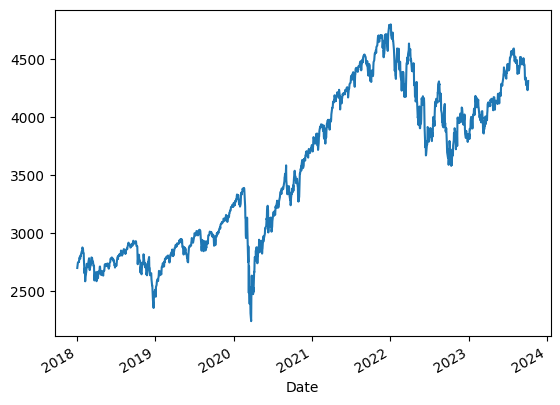

In [4]:

tickers = ['AAPL', 'MSFT', '^GSPC']


start_date = '2018-01-01'

end_date = date.today()


data = yf.download(tickers[2],start_date,end_date)


data['Adj Close'].plot()
plt.show()


[*********************100%%**********************]  3 of 3 completed
                  AAPL        MSFT        ^GSPC
Date                                           
2023-01-03  124.538658  237.956345  3824.139893
2023-01-04  125.823189  227.547363  3852.969971
2023-01-05  124.488869  220.803360  3808.100098
2023-01-06  129.069336  223.405609  3895.080078
2023-01-09  129.597076  225.580780  3892.090088


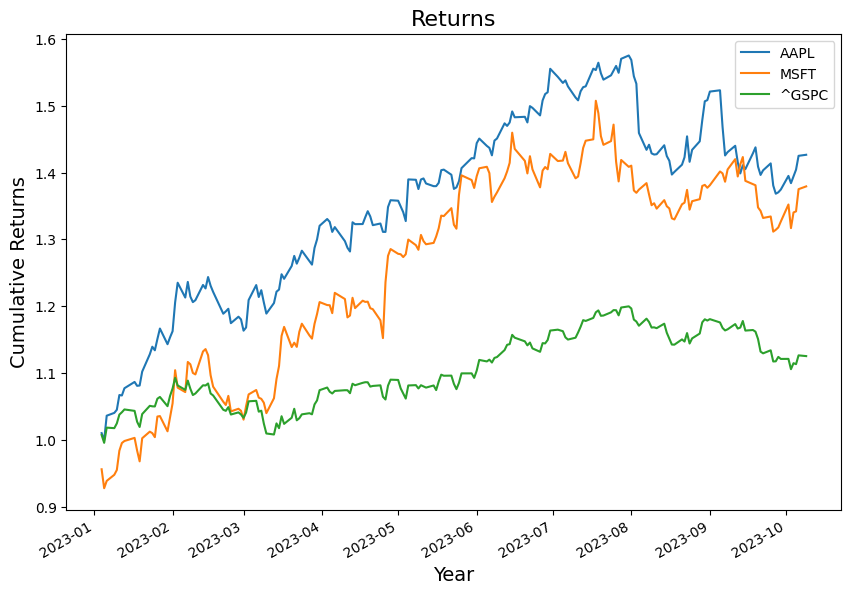

In [5]:
data = yf.download(tickers,'2023-1-1')['Adj Close']
print(data.head())


((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
#plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

2022-09-30    352755000000.0
2021-09-30    351002000000.0
2020-09-30    323888000000.0
Name: Total Assets, dtype: object


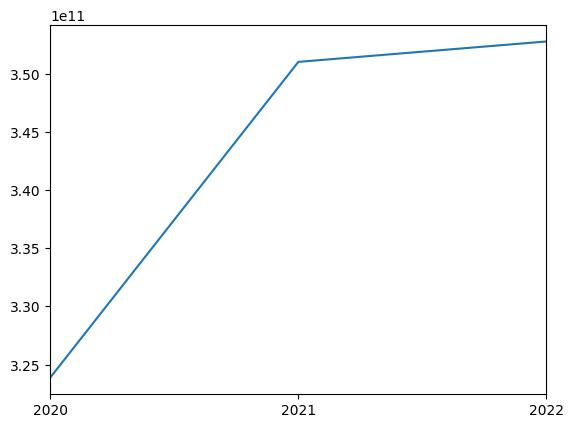

In [6]:
msft = yf.Ticker("aapl")
balance_sheet = msft.balance_sheet
total_assets = balance_sheet.loc['Total Assets']

print(total_assets.head())
total_assets.plot()
plt.show()

In [7]:
def get_pe(ticker):
  stock = yf.Ticker(ticker)
  foreward_pe = stock.info['forwardPE']
  return foreward_pe


def get_mc(ticker):
  stock = yf.Ticker(ticker)
  market_cap = stock.info['marketCap']
  return market_cap


print(get_pe("aapl"))

26.962063


In [8]:
msft = yf.Ticker("aapl")
print(msft.info)

{'address1': 'One Apple Park Way', 'city': 'Cupertino', 'state': 'CA', 'zip': '95014', 'country': 'United States', 'phone': '408 996 1010', 'website': 'https://www.apple.com', 'industry': 'Consumer Electronics', 'industryKey': 'consumer-electronics', 'industryDisp': 'Consumer Electronics', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In add

In [9]:
import plotly.graph_objects as go

stock_symbol = "AAPL"  # Replace with the symbol of the stock you want to graph
start_date = date.today()- timedelta(days=730)
end_date = date.today()

# Download historical stock data using yfinance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

stock_data['MA5'] = stock_data['Close'].rolling(window=50).mean()
stock_data['MA10'] = stock_data['Close'].rolling(window=100).mean()
stock_data['MA50'] = stock_data['Close'].rolling(window=200).mean()


fig = go.Figure(data=[go.Candlestick(
                x=stock_data.index,
                open=stock_data['Open'],
                high=stock_data['High'],
                low=stock_data['Low'],
                close=stock_data['Close']
)])


fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['MA5'], line=dict(color='orange', width=1), name='MA5'))
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['MA10'], mode='lines', name='MA10'))
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['MA50'], mode='lines', name='MA50'))



fig.update_layout(
    title=f'{stock_symbol}',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False,
    template="plotly_dark",
    height=600,
    width=1000
)

# Show the chart
fig.show()

[*********************100%%**********************]  1 of 1 completed


# Fred api economic analysis

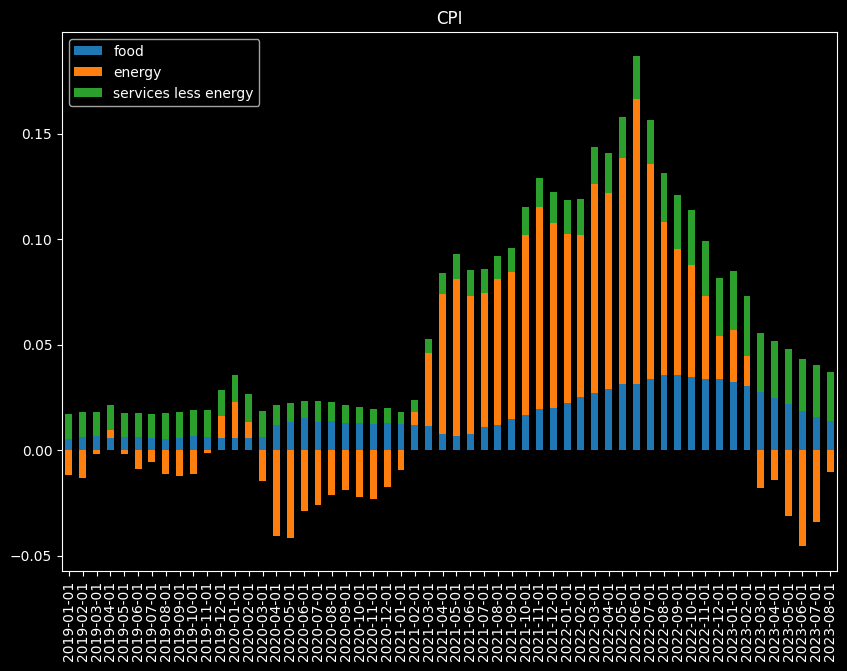

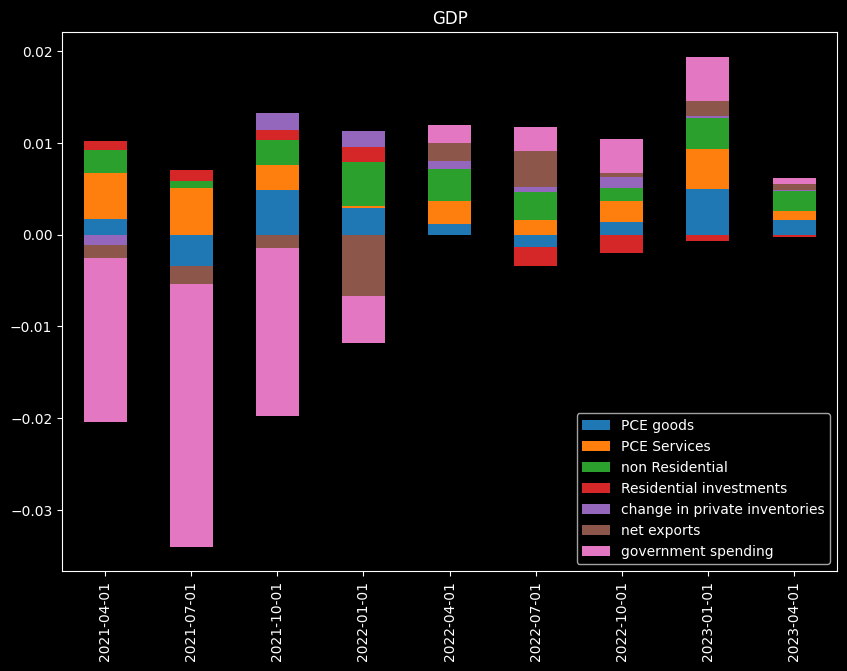

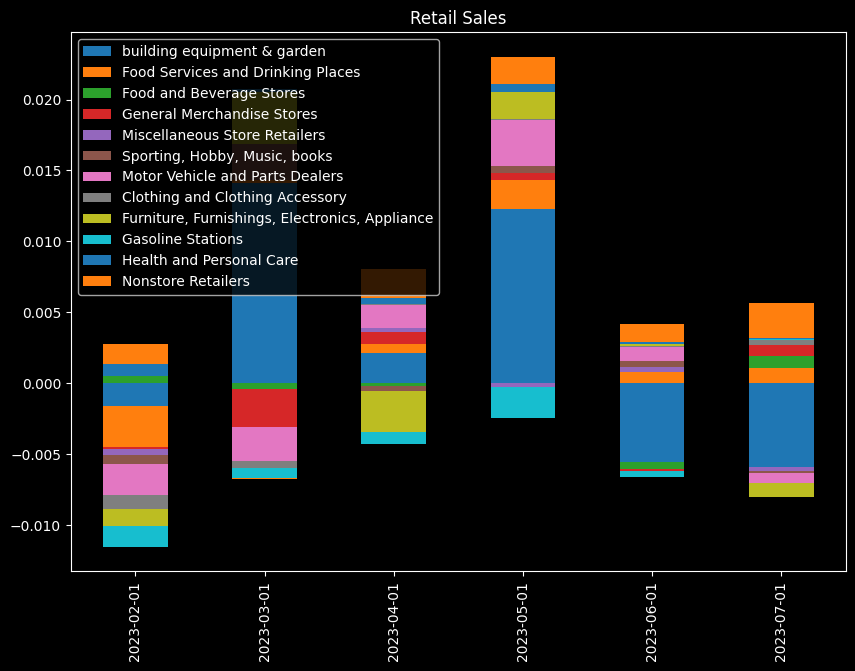

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fredapi import Fred
from matplotlib.dates import DateFormatter
import plotly.express as px




gdp = {
    "PCE goods": "DGDSRC1",
    "PCE Services": "PCES",
    "non Residential": "PNFI",
    "Residential investments": "PRFI",
    "change in private inventories": "A371RX1Q020SBEA",
    "net exports": "NETEXP",
    "government spending": "FGEXPND"
}

retail_sales = {
    "building equipment & garden": "MRTSSM444USN",
    "Food Services and Drinking Places": "RSFSDP",
    "Food and Beverage Stores": "MRTSSM445USS",
    "General Merchandise Stores": "RSGMS",
    "Miscellaneous Store Retailers": "RSMSR",
    "Sporting, Hobby, Music, books": "MRTSSM451USN",
    "Motor Vehicle and Parts Dealers": "MRTSSM441USS",
    "Clothing and Clothing Accessory": "RSCCAS",
    "Furniture, Furnishings, Electronics, Appliance": "MRTSSM4423XUSN",
    "Gasoline Stations": "RSGASS",
    "Health and Personal Care": "RSHPCS",
    "Nonstore Retailers": "RSNSR"
}


cpi = {
    "food": "CPIUFDSL",
    "energy": "CPIENGSL",
    "services less energy": "CUSR0000SASLE"
}


def plot_stacked_bar(indicators, monthly_change, start, title):
    key = "c3619cc6ce529beafc9b8a161b95a1da"
    fred = Fred(api_key = key)

    df = pd.DataFrame()
    df_1 = pd.DataFrame()
    df_2 = pd.DataFrame()
    for series_id in indicators.values():
        data = fred.get_series(series_id, observation_start= start)
        df[series_id] = data

    df.index = df.index.date # change to pd date
    df_1['total'] = df.iloc[:, :].sum(axis=1) # new df with total calculation


    df_2 = df.div(df_1['total'], axis=0)

    df = df.pct_change(monthly_change)

    df = df * df_2

    df = df.dropna()
    plt.style.use('dark_background')

    ax = df.plot(figsize = (10,7),kind='bar', stacked=True, color = plt.cm.tab10.colors )
    #axes2 = plt.twinx()
    #axes2.plot(df_1['total'], color='red', label='Total')
    #plt.axhline(0, color='white')
    ax.legend(indicators.keys())
    plt.title(title)
    plt.show()

#df['total'] = df.iloc[:, 1:].sum(axis=1)

plot_stacked_bar(cpi, 12, "2018", "CPI")
plot_stacked_bar(gdp, 1, "2021", "GDP")
plot_stacked_bar(retail_sales, 1, "2023", "Retail Sales")

,rev/p,ocf/p,ebidta/ev,eps/p
AAPL,0.142717,0.042031,0.044276,0.034579
MSFT,0.091883,0.037974,0.043909,0.031151
GOOGL,0.380522,0.130300,0.058413,0.037116
TSLA,0.121202,0.017989,0.021879,0.014442


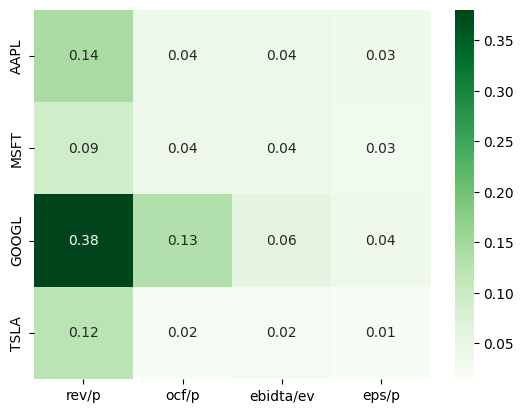

In [ ]:
# heatmap for equity ratios
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sn
from IPython.display import display

# Define a list of tickers
tickers = ['AAPL', 'MSFT', 'GOOGL', 'TSLA']  # Add more tickers as needed

# Create an empty DataFrame with tickers as the index
df = pd.DataFrame(index=tickers)

def format_large_num(value):
    if value is None:
        return None
    elif 1e6 <= value <= 1e9:
      return f'{value / 1e6:.1f} M' #returns formated million to one decimal

    elif value >= 1e12:
      return f'{value / 1e12:.1f} T' #returns formated Trillion to one decimal

    return f'{value / 1e9:.1f} B'


# Loop through tickers and fetch data

for ticker in tickers:
    try:
        # Fetch financial data for the ticker
        stock = yf.Ticker(ticker)
        data = stock.info
        shares_out = data.get('sharesOutstanding', None)
        current_price = data.get('currentPrice', None)
        total = shares_out * current_price

        # Revenue/p

        revenue = data.get('totalRevenue', None)
        if revenue is not None:
            rev_ratio = revenue/total
            df.loc[ticker, 'rev/p'] = rev_ratio
        else:
            df.loc[ticker, 'rev/p'] = None


        # OCf/p
        operating_cashflow = data.get('operatingCashflow', None)  # cash flow statement totalCashFromOperatingActivities
        market_cap = data.get('marketCap', None)

        if operating_cashflow is not None and market_cap is not None:
            ocf_ratio = operating_cashflow / total
            df.loc[ticker, 'ocf/p'] = ocf_ratio
        else:
            df.loc[ticker, 'ocf/p'] = None
        # ebidta enterpriseValue

        ebidta = data.get('ebitda', None)
        enterprise_val = data.get('enterpriseValue', None)

        if enterprise_val is not None and ebidta is not None:
            ebit_ev_ratio = ebidta/enterprise_val
            df.loc[ticker, 'ebidta/ev'] = ebit_ev_ratio
        else:
            df.loc[ticker, 'ebitdta/ev'] = None

        #eps/p
        eps_trailing = data.get('trailingEps', None)

        if eps_trailing is not None:
            eps_ratio = eps_trailing/current_price
            df.loc[ticker, 'eps/p'] = eps_ratio
        else:
            df.loc[ticker, 'eps/p'] = None



    except Exception as e:
        print(f"Error fetching data for {ticker}: {str(e)}")







display(df)




fig = px.imshow(df, text_auto=True,)
fig.show()

'''
text = df.astype(str)
text_template = np.vectorize(text)

# Create the heatmap trace with text labels
heatmap_trace = go.Heatmap(
    y=df.index,
    x=df.columns,
    z=df.values,  # Use the numeric values
)
# Create the figure
fig = go.Figure(data=[heatmap_trace])

fig.show()
'''


hm = sn.heatmap(df, annot=True, fmt='.2f', cmap="Greens")
plt.show()


# options mesh grid

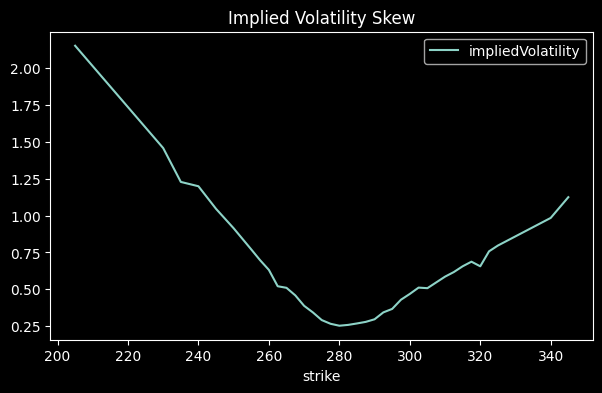

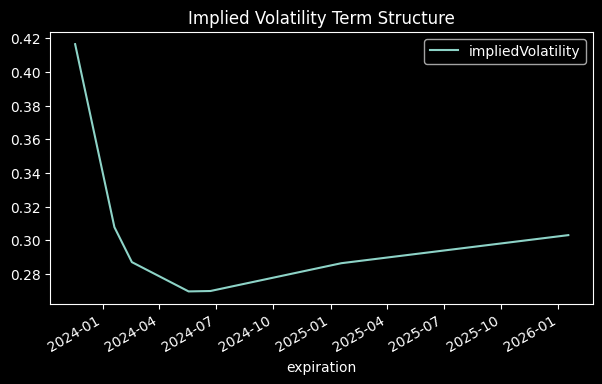

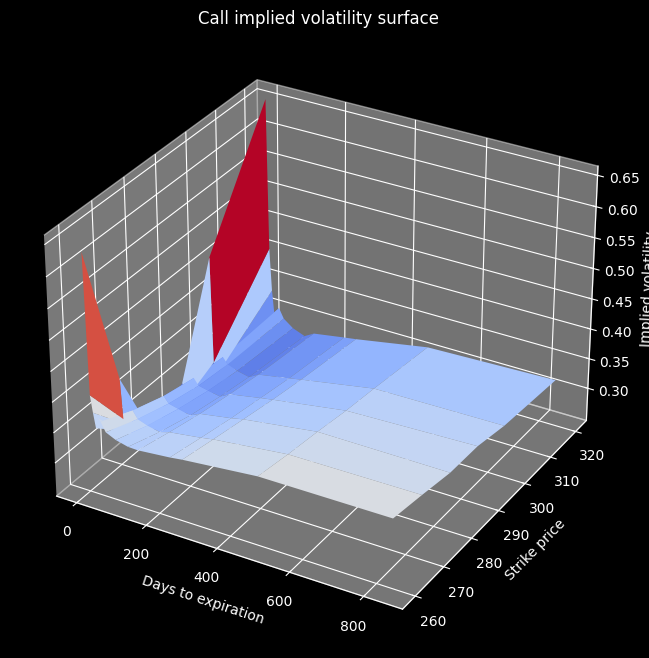

In [ ]:
import plotly.graph_objects as go

import datetime as dt

import matplotlib.cm as cm


ticker = "cat"
putcall = "call"


def option_chains(ticker):

    asset = yf.Ticker(ticker)
    expirations = asset.options

    chains = pd.DataFrame()

    for expiration in expirations:
        # tuple of two dataframes
        opt = asset.option_chain(expiration)

        calls = opt.calls
        calls['optionType'] = "call"

        puts = opt.puts
        puts['optionType'] = "put"

        chain = pd.concat([calls, puts])
        chain['expiration'] = pd.to_datetime(expiration) + pd.DateOffset(hours=23, minutes=59, seconds=59)

        chains = pd.concat([chains, chain])

    chains["daysToExpiration"] = (chains.expiration - dt.datetime.today()).dt.days + 1

    return chains


#print(option_chains("MSFT"))



options = option_chains(ticker)

calls = options[options["optionType"] == putcall]



# print the expirations
set(calls.expiration)

# select an expiration to plot
calls_at_expiry = calls[calls["expiration"] == "2023-09-29 23:59:59"]

# filter out low vols
filtered_calls_at_expiry = calls_at_expiry[calls_at_expiry.impliedVolatility >= 0.001]

# set the strike as the index so pandas plots nicely
filtered_calls_at_expiry[["strike", "impliedVolatility"]].set_index("strike").plot(
    title="Implied Volatility Skew", figsize=(7, 4)
)



# select an expiration to plot
calls_at_strike = options[options["strike"] == 400.0]

# filter out low implied volatilities
filtered_calls_at_strike = calls_at_strike[calls_at_strike.impliedVolatility >= 0.001]

# set the strike as the index so pandas plots nicely
filtered_calls_at_strike[["expiration", "impliedVolatility"]].set_index("expiration").plot(
    title="Implied Volatility Term Structure", figsize=(7, 4)
)



# pivot the dataframe
surface = (
    calls[['daysToExpiration', 'strike', 'impliedVolatility']]
    .pivot_table(values='impliedVolatility', index='strike', columns='daysToExpiration')
    .dropna()
)

# create the figure object
fig = plt.figure(figsize=(10, 8))

# add the subplot with projection argument
ax = fig.add_subplot(111, projection='3d')

# get the 1d values from the pivoted dataframe
x, y, z = surface.columns.values, surface.index.values, surface.values

# return coordinate matrices from coordinate vectors
X, Y = np.meshgrid(x, y)

# set labels
ax.set_xlabel('Days to expiration')
ax.set_ylabel('Strike price')
ax.set_zlabel('Implied volatility')
ax.set_title('Call implied volatility surface')

# plot
ax.plot_surface(X, Y, z, cmap=cm.coolwarm,)
plt.style.use('dark_background')

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y, colorscale='mygbm')])

fig.update_layout(
    scene=dict(
        xaxis_title='Days to expiry',
        yaxis_title='Strike',
        zaxis_title='IV',

    ),
    template="plotly_dark",
    height=1000,
    width=1000,
    title = "{} {} iv surface".format(ticker, putcall)
)
fig.update_traces(showscale=False)




fig.show()